Construi no paint um dataset com 3 classes de figuras desenhadas a mão, casa, coqueiro e óculos, vou treinar uma cnn para classificar novas entradas

In [227]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [216]:
model = Sequential([
    InputLayer(shape=(64,64,1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: casa, coqueiro, oculos
])


In [217]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,963 (6.20 MB)

 Trainable params: 1,624,963 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [218]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [219]:
# gerar mais dados, só desenhei 35 de cada classe
datagen = ImageDataGenerator(
    rescale=1./255,  # Normaliza os valores dos pixels para [0, 1]
    rotation_range=20,  # Rotaciona as imagens em até 20 graus
    width_shift_range=0.2,  # Move as imagens horizontalmente em até 20%
    height_shift_range=0.2,  # Move as imagens verticalmente em até 20%
    shear_range=0.2,  # Aplica um efeito de cisalhamento em até 20%
    zoom_range=0.2,  # Aplica zoom nas imagens em até 20%
    horizontal_flip=True,  # Permite flip horizontal das imagens
    fill_mode='nearest',  # Preenche os pixels faltantes após a transformação
    validation_split=0.2  # Reserva 20% dos dados para validação
)


In [220]:
# criar reinamento
train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale', 
    subset='training'
)


Found 85 images belonging to 3 classes.


In [221]:
# criar treinamento
validation_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale', 
    subset='validation'
)


Found 20 images belonging to 3 classes.


In [222]:
# treinamento do modelo
model.fit(train_generator, epochs=50, validation_data=validation_generator)
model.save('desenho_model.h5')


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.3598 - loss: 1.1833 - val_accuracy: 0.3500 - val_loss: 1.1097
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2773 - loss: 1.1074 - val_accuracy: 0.3500 - val_loss: 1.1066
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4363 - loss: 1.0798 - val_accuracy: 0.4000 - val_loss: 1.0788
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4782 - loss: 1.0446 - val_accuracy: 0.4500 - val_loss: 1.0886
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4370 - loss: 1.0183 - val_accuracy: 0.5000 - val_loss: 1.0858
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6145 - loss: 0.9861 - val_accuracy: 0.4000 - val_loss: 1.0653
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6362 - loss: 0.9474 - val_accuracy: 0.5500 - val_loss: 1.0645
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6091 - loss: 0.8892 - val_accuracy: 0.5500 - val_loss: 1.0940

In [223]:
# carrega o modelo treinado
model = load_model('desenho_model.h5')

def reconhecer_objeto(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64)) 
    if np.mean(img) < 50:
        img = cv2.bitwise_not(img)   
        img[img != 255] = 0

    # cv2.imwrite('casaPos.png', img)
    
    # adicional canal de cor
    img = np.expand_dims(img, axis=0)
    
    # prever
    predictions = model.predict(img)
    print(predictions)

    classes = ['Casa', 'Coqueiro', 'Oculos']
    
    return classes[np.argmax(predictions)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1. 0. 0.]]
Casa


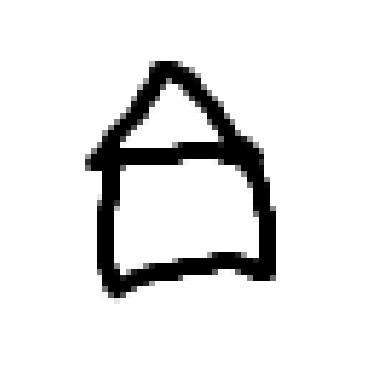

In [231]:
image_path = "casa.png"
objeto = reconhecer_objeto(image_path)
print(objeto)

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0. 1. 0.]]
Coqueiro


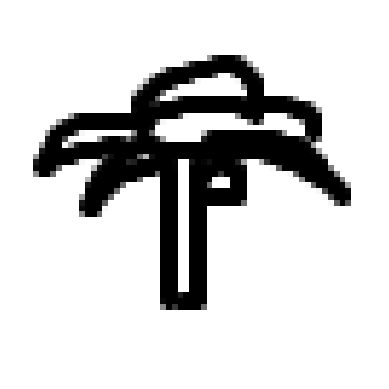

In [228]:
image_path = "coqueiro.png"
objeto = reconhecer_objeto(image_path)
print(objeto)

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0. 0. 1.]]
Oculos


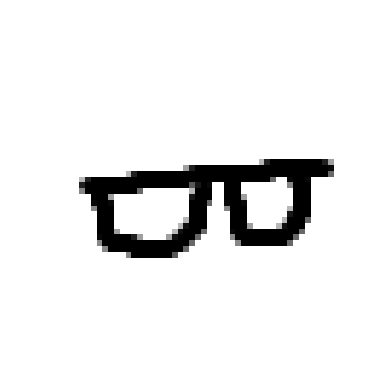

In [229]:
image_path = "oculos.png"
objeto = reconhecer_objeto(image_path)
print(objeto)

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()